<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in using NumPy and SciPy 

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

We can do linear regression with ordinary. 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt


## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data


In [3]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

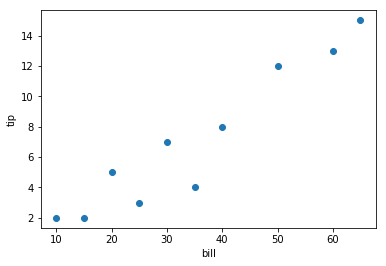

In [4]:
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

## Step 3: Run Linear Regression in plain SciPy

Let's run our linear regression. We will do this with the scipy.stats.linregres

In [5]:
gradient,intercept,r_value,p_value,std_err=stats.linregress(tip_data.bill,tip_data.tip)
print("Gradient and intercept",gradient,intercept)
print("R-squared",r_value**2)
print("p-value",p_value)

Gradient and intercept 0.242857142857 -1.4
R-squared 0.906714076553
p-value 2.15282168529e-05



## Step 4: Run Linear Regression in OLR

Let's run our linear regression.  To do this we need to run call the LinearRegression Classs

In [6]:
result = sm.ols(formula="tip ~ bill", data=tip_data).fit()
result

In [7]:
result.summary()

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     77.76
Date:                Wed, 06 Jun 2018   Prob (F-statistic):           2.15e-05
Time:                        20:49:38   Log-Likelihood:                -17.429
No. Observations:                  10   AIC:                             38.86
Df Residuals:                       8   BIC:                             39.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4000      1.081     -1.295      0.231      -3.892       1.092
bill           0.2429      0.028      8.818      0.000       0.179       0.306
==============================================================================
Omnibus:                        3.785   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.654
Skew:                          -0.996   Prob(JB):                        0.437
Kurtosis:                       3.036   Cond. No.                         86.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
tip_data.tip

0    12.0
1     7.0
2    13.0
3     8.0
4    15.0
5     5.0
6     2.0
7     2.0
8     3.0
9     4.0
Name: tip, dtype: float64

In [9]:
from scipy.stats.stats import pearsonr   

print(pearsonr(tip_data.bill, tip_data.tip)[0])

0.952215351983


In [10]:
result.params[1]

0.24285714285714277

## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **

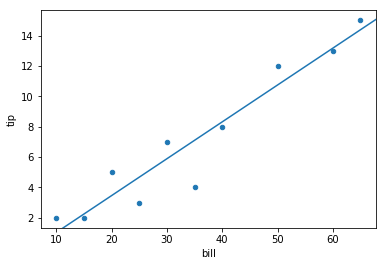

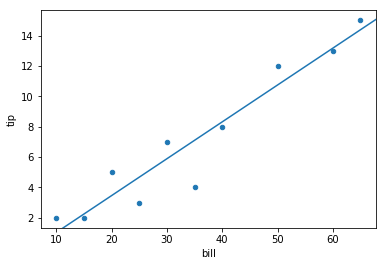

In [11]:
ax = tip_data.plot(x='bill', y='tip', kind='scatter')
from statsmodels.graphics.regressionplots import abline_plot
abline_plot(model_results=result, ax=ax)

In [ ]:
# Create a list of values in the best fit line
# TODO: Fill in gradient and intercept in formula
abline_values = [??? * i + ??? for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

In [ ]:
# Make a prediction using the slope and the intercept
y_pred = tip_data.bill.values.reshape(10,1)
y_test = tip_data.tip.values.reshape(10,1)




## Step 8: Print out the Outputs

Here is a sample output:

## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [ ]:
resid = (??? * tip_data.bill + ???) - tip_data.tip

In [ ]:
plt.scatter(tip_data.bill, resid)
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [ ]:

intercept = ??? # This is the intercept
slope = ??? #This is the slope

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(slope))
print("Intercept: %s" % str(intercept))

a = slope
b = intercept


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **




### TODO: Calcluate Tip for 100 bill.

In [ ]:
tip_for_100 = ??? * 100 + ??? 
print(tip_for_100)


## Step 12: Add a estimated_tip column to pandas dataframe

**=>TODO: create a new pandas column called est_tip **

In [ ]:
tip_data['est_tip'] =  ???
tip_data

## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use model to transform dataframe with feature vectors to make predictions **

In [ ]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]
             })

test_data_pd['predicted_tip'] = result.predict(test_data_pd)



test_data_pd